# PART A (pre-processing)

### Load dataset and  split into train/dev/test
* Download the dataset from tensorflow 
* select only the digits 5, 6 using the proper filter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = np.isin(y_train, [5, 6])
test_filter = np.isin(y_test, [5, 6])

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [3]:
print("x_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("x_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

x_train shape = (11339, 28, 28)
y_train shape = (11339,)

x_test shape = (1850, 28, 28)
y_test shape = (1850,)


**Split the train dataset into train and dev, using 80% and 20% of initial dataset, respectively**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

In [5]:
print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("X_dev shape =", X_dev.shape)
print("y_dev shape =", y_dev.shape)
print()
print("X_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

X_train shape = (9071, 28, 28)
y_train shape = (9071,)

X_dev shape = (2268, 28, 28)
y_dev shape = (2268,)

X_test shape = (1850, 28, 28)
y_test shape = (1850,)


### Visualize some digits

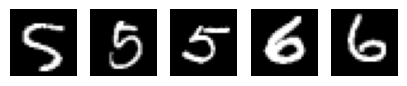

In [6]:
import random
random.seed(1)

plt.figure(figsize=(5,2))
plt.gray()

for i in range(5):
    plt.subplot(1, 5, i+1).axis('off')
    plt.imshow(X_train[random.randint(0, X_train.shape[0])])

plt.show()

### Process datasets
Reshape dimensionalities of each training/dev/test example to a vector of 784 dimensions



In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_dev = X_dev.reshape(X_dev.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
print("x_train shape =", X_train.shape)
print("x_dev shape =", X_dev.shape)
print("x_test shape =", X_test.shape)

x_train shape = (9071, 784)
x_dev shape = (2268, 784)
x_test shape = (1850, 784)


**Convert each vector element into a real number between [0, 1]**

In [9]:
X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0

**Convert y_train / y_dev / y_test datasets as:**
* if class is 5 (digit 5) convert to 0
* if class is 6 (digit 6) convert to 1

This will help us at optimizer implemantation.

In [10]:
y_train = (y_train == 6).astype(int).reshape(-1,1)
y_dev = (y_dev == 6).astype(int).reshape(-1,1)
y_test = (y_test == 6).astype(int).reshape(-1,1)

In [11]:
print("y_train shape =", y_train.shape)
print("y_dev shape =", y_dev.shape)
print("y_test shape =", y_test.shape)

y_train shape = (9071, 1)
y_dev shape = (2268, 1)
y_test shape = (1850, 1)
